# **Ipydoodle을 활용한 주사위 전개도 만들기**

영희가 철수에게 크기 50짜리 정육면체 주사위를 만들어달라고 했습니다. 영희는 철수가 크기가 다른 주사위 하나를 만들어줄 때마다 만원을 주겠다고 약속했습니다.  

철수는 꾀를 부려서 크기와 무관하게 주사위 도안을 만드는 프로그램을 제작해 주사위를 빠르게 만들어 손쉽게 돈을 벌려고 합니다.  
철수의 주사위 사업이 번창하기 위해서는 여러분의 도움이 필요합니다. 철수가 만들어야 하는 주사위의 도면은 다음과 같습니다.

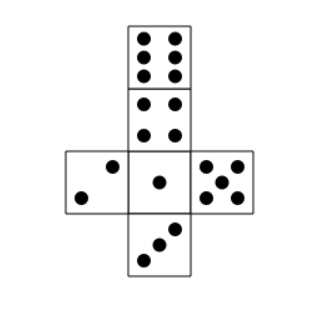

철수는 아래의 순서대로 주사위 도안을 만들려고 합니다.

1. 우선 주사위크기를 50이라고 가정하고, 주사위의 한 면에 해당하는 상자를 알맞은 위치에 만들어줍니다.
2. 이런! 두들은 아직 상자에 테두리를 그리는 기능이 없네요. 직접 그려줍시다.
3. 숫자 1~6에 해당하는 면을 간편히 그릴 수 있도록 모듈화를 합시다.
4. 주사위의 각 면에 해당하는 숫자를 검은색 점으로 표시해줍니다. 
5. 주사위의 크기를 변수로 입력받아 주사위를 만들 수 있는 새로운 함수를 만들어봅시다.
6. 다양한 크기의 모든 주사위를 만들어봅시다! 이제 철수는 돈을 벌 수 있습니다!

## Step 1 : 주사위의 한 면 만들기
우선 주사위크기를 50이라고 가정하고, 주사위의 한 면에 해당하는 상자를 알맞은 위치에 만들어줍니다.

In [18]:
world = World(width = 100, height = 100, color = 'white', axis = False)
Box(x = 0, y = 0, width = 50, height = 50, color = 'black') #배경색과 구분하기 위해 잠시 검은색으로 해봤어요^^

Canvas(height=100, width=100)

## Step 2 : 테두리 그리기
이런! 철수가 가지고 있는 프로그램은 아직 상자에 테두리를 그리는 기능이 없네요. 대신 선을 그리는 기능이 있으니, 이를 이용해서 직접 그려줍시다.  
우선 (0, 0) 좌표를 중심으로 높이와 넓이가 모두 50인 사각형을 line으로 그려봅시다.   
힌트 : (0, 0)이 사각형의 중심이라면 line의 좌표는 x, y 각각 중심에서 25만큼씩만 떨어지면 되겠죠? (사각형 한변의 길이가 50이기 때문에 중심에서는 50/2만큼만 떨어지면 된다는 것을 생각하면 쉬울 거예요!)

In [19]:
world = World(width = 100, height = 100, color = 'white', axis = False)
Box(x = 0, y = 0, width = 50, height = 50, color = 'white') 
box_points = [[25, 25], [25, -25], [-25, -25], [-25, 25]] #line을 그릴 좌표를 1, 4, 3, 2 사분면 순으로 저장했습니다. 
    # 좌표 저장 순서는 달라도 상관 없으나, 순환되도록 배치해야 합니다. 
    # 예를 들어 [1, 2, 3, 4], [4, 3, 2, 1], [2, 3, 4, 1] 혹은 [3, 2, 1, 4] 처럼요.

for i in range(len(box_points)): # 종이에 반복 결과를 그려가면서 최종 결과를 확인해보세요. 
    from_point = box_points[i] # 반복 결과 : box_point[0] -> box_point[1] -> box_point[2] -> box_point[3]
    to_point = box_points[(i + 1) % len(box_points)] # 반복 결과 : box_point[1] -> box_point[2] -> box_point[3] -> box_point[0]
    Line(x1 = from_point[0], y1 = from_point[1], x2 = to_point[0], y2 = to_point[1], color = 'black') # 위의 두 point를 좌표로 한 선을 그립니다. 

Canvas(height=100, width=100)

## Step 3: 상자를 간편히 그릴 수 있는 함수 만들기!

숫자 1~6에 해당하는 상자를 간편히 그릴 수 있도록 모듈화를 합시다. 상자 하나를 그릴 수 있는 `draw_box` 함수를 만들어주세요! `draw_box`는 다음의 조건을 만족해야 합니다. 
* 길이가 2인 배열을 첫번째 매개변수로 받습니다. 배열의 첫번째, 두번째 원소 각각 사각형 중심의 x좌표와 y좌표입니다. 

In [2]:
def draw_box(box_center_position = [0, 0]):
    Box(x = box_center_position[0], y = box_center_position[1], width = 50, height = 50, color = 'white')
    box_points = [[25, 25], [25, -25], [-25, -25], [-25, 25]]
    for i in range(len(box_points)):
        from_point = box_points[i]
        to_point = box_points[(i + 1) % len(box_points)]
        Line(
            x1 = box_center_position[0] + from_point[0], # 중심에서 25씩 떨어져야 한다는 거 기억나죠? (0, 0)이 아닐 수 있기 때문에, 중심값에 point 좌표값을 더해주어야 합니다.  
            y1 = box_center_position[1] + from_point[1],
            x2 = box_center_position[0] + to_point[0],
            y2 = box_center_position[1] + to_point[1],
            color = 'black',
            alpha = 1
        )

world = World(width = 100, height = 100, color = 'white', axis = False)
draw_box([0, 0])

Canvas(height=100, width=100)

## Step 4 만들어둔 함수로 숫자 1~6에 해당하는 상자를 그려볼까요?
    A. 2차원 배열 개념 익히기
    B. 실제 구현해보기

### A. 2차원 배열 개념 익히기
위에서 만든 `draw_box` 함수에서 매개변수로 받은 배열은 1차원 배열입니다.   
(첫번째 원소는 x 좌표, 두번째 원소는 y좌표를 의미했죠.)  
그렇다면 6개 상자의 x, y좌표를 한꺼번에 전달해주려면 어떻게 해야할까요? 바로 2차원 배열을 사용해야 합니다!   
* 2차원 배열은 배열 안에 또 다른 배열이 있는 것이라고 생각하면 간단합니다.  
  
파이썬에서는 2차원 배열에서 for 반복문을 사용하려면 다음과 같이 코드를 짜야 합니다.

In [4]:
array = [[1, 1], [2, 2], [3, 3], [4, 4]]
for item in array:
    print(item)

[1, 1]
[2, 2]
[3, 3]
[4, 4]


### B. 실제 구현해보기
> 아래 코드에는 1~6에 해당하는 상자의 위치를 나타내는 2차원 배열 box_positions가 주어져있습니다.  
4-A 에서 배운 개념(2차원 배열)을 활용해 `draw_box`를 반복 호출해보세요.

In [2]:
World(width = 300, height = 300, color = 'white', axis = False)
box_positions = [[0, 0], [-50, 0], [0, -50], [0, 50], [50, 0], [0, 100]]
    # 사각형 한 변의 길이가 50입니다. 
    # 주사위의 각 면에 해당하는 사각형들은 서로 50씩 떨어져 있어야 한다는 점에 유의하며 box_position 배열을 이해해보세요. 

# ---
# box_position의 각 좌표를 중심으로 하는 사각형을 6개 만드는 반복문입니다. 반복문 진행 과정을 종이에 그려가며 이해해보세요. 
for i in range(len(box_positions)): # range(6) 과 같은 의미입니다. 
    draw_box(box_positions[i]) 

Canvas(height=300, width=300)

## Step 5 주사위의 각 면에 해당하는 숫자를 검은색 점으로 표시하기!
- 점을 찍을 수 있는 함수 `draw_dots`를 만들어주세요! 
- draw_dots는 다음의 조건을 만족해야 합니다. 
- 점 하나의 반지름은 5.5입니다.
- 1차원 배열 box_center_position과 2차원 배열 circle_positions를 매개변수로 받습니다.
   - 2차원 배열을 매개변수로 받을 때에는 2차원 배열의 기본형식인 "[[0, 0]]" 형식으로 받아주어야 합니다. 
   - 2차원 배열이 헷갈린다면 4-A의 개념을 참고해주세요

- 힌트!
    - box_center_position은 검은색 점을 표시할 주사위의 한 면을 이루는 사각형의 중심점 x좌표와 y좌표를 원소로 받는 1차원 배열입니다.
    - circle_positions는 해당 주사위의 한 면에 표시되어야 하는 검은색 점들의 중심점 x, y좌표 배열의 배열, 즉 좌표들을 원소로 갖는 2차원 배열입니다.
    - 검은색 점들의 좌표는 box_center_position 좌표를 좌표축으로 한 좌표입니다.   
    (따라서 원하는 위치에 검은색 점을 표시하기 위해서는 box_center_position의 좌표에 검은색 점의 좌표를 더해주어야겠죠?)
    - 검은색 점들은 circle_positions에 있는 좌표들의 개수만큼 그려져야 하겠죠? 이 점을 고려한다면 반복 횟수를 알 수 있습니다. 
 
    

In [5]:
def draw_dots(box_center_position = [0, 0], circle_positions = [[0, 0]]): #2차원 배열 속에는 해당 주사위 면의 숫자 만큼의 원의 중심 좌표가 들어가게 되겠죠. 
    for circle_position in circle_positions: #2차원 배열의 원소만큼 반복! 즉, 해당 주사위 면의 숫자 만큼 반복하게 될 것입니다.  
        Circle(
            x = box_center_position[0] + circle_position[0], # 사각형의 중심점의 x좌표에 검은색 점의 중심 x좌표를 더해주고 있습니다. 
            y = box_center_position[1] + circle_position[1], # 사각형의 중심점의 y좌표에 검은색 점의 중심 y좌표를 더해주고 있습니다.
            radius = 5.5,
            color = 'black'
        )

world = World(width = 100, height = 100, color = 'white', axis = False)
draw_box([0, 0])
draw_dots([0, 0], [[0, 0]])

Canvas(height=100, width=100)

## Step 6 이제 상자와 점을 모든 숫자에 대해 찍어볼까요?
    A. 다차원 배열 익히기 (1D, 2D, 3D)
    B. 직접 구현하기
    

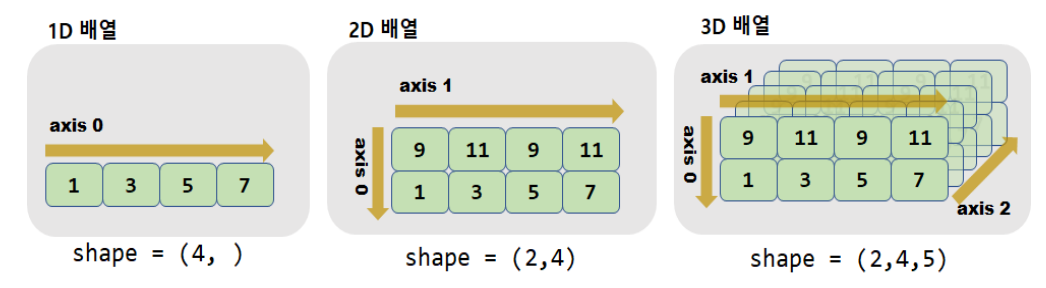

### A. 다차원 배열 익히기
> 이번에는 1~6에 해당하는 상자에는 점의 갯수가 여러개 존재합니다.  
우리는 2차원 배열을 점의 위치를 나타내는데 썼기 때문에, 이를 모아서 한번에 전달해주려면 3차원 배열이 필요합니다.  
(3차원 배열을 간단하게 설명하면, "배열의 배열의 배열"이라고 할 수 있습니다.   
   즉 가장 겉의 배열 안에 배열이 원소로 있고, 그 배열 속에 또 배열이 원소로 있는 형태입니다.)  
앞서 4.A.와 마찬가지로 3차원 배열을 사용하려면 다음과 같이 사용합니다.

In [6]:
array = [ [[-1, 0]],  [ [1, 2], [3, 4] ],  [[5, 6]] ]  # 자세히 보면, "배열의 배열의 배열"이라는 말이 이해될 겁니다.ㅎㅎ

for item in array:
    print(item)

[[-1, 0]]
[[1, 2], [3, 4]]
[[5, 6]]


### B. 직접 구현하기
> 아래 코드에는 1부터 6까지 해당하는 상자의 중심 위치를 나타내는 2차원 배열 box_positions과  
1부터 6까지 해당하는 상자를 기준으로 하는 점의 위치를 나타내는 3차원 배열 dot_positions가 있습니다. (아래와 같은 형식으로 작성될 것입니다.)  
** [ [1상자 검은점], [ [2상자 검은점1],[2상자 검은점2] ], [ [3상자 검은점1, [3상자 검은점2], [3상자 검은점3] ], ... , [...[6상자 검은점5], [6상자 검은점6] ] ]       
4-A(2차원 배열)와 6-A(다차원 배열)에서 배운 개념을 활용해 `draw_box`, `draw_dots`를 반복 호출해보세요.

In [10]:
World(width = 500, height = 500, color = 'white', axis = False)
box_positions = [[0, 0], [-50, 0], [0, -50], [0, 50], [50, 0], [0, 100]]
dot_positions = [
    [[0, 0]],  # 숫자 1 상자 검은점 좌표
    [[12.5, 12.5], [-12.5, -12.5]], # 숫자 2 상자 검은점 좌표들
    [[12.5, 12.5], [-12.5, -12.5], [0, 0]],
    [[12.5, 12.5], [-12.5, -12.5], [-12.5, 12.5], [12.5, -12.5]],
    [[12.5, 12.5], [-12.5, -12.5], [-12.5, 12.5], [12.5, -12.5], [0, 0]],
    # [[12.5, 0], [12.5, 15], [12.5, -15], [-12.5, 0], [-12.5, 15], [-12.5, -15]],  숫자 6 상자 검은점 좌표들
    [[12.5, 0], [12.5, 12.5], [12.5, -12.5], [-12.5, 0], [-12.5, 12.5], [-12.5, -12.5]]
]

# 참고1 : dot_position 좌표는 상자 한 변 길이 50을 4로 나눈 값입니다. (상자의 중심을 기준으로 사각형을 사분했을 때 한 사분면의 중심을 잡아야 하기 때문입니다.)
# 참고2 : 숫자 6 상자의 y축 좌표 설정 방법........추가하기!!!!

for i in range(6):
    draw_box(box_positions[i])
    draw_dots(box_positions[i], dot_positions[i])

Canvas(width=500)

## Step 7 한 모서리의 길이를 변수로 받아 주사위를 만들 수 있는 새로운 함수를 만들어봅시다. 
* 이 때까지 만든 함수를 주사위 크기를 받을 수 있도록 수정해볼까요?
* `draw_dots`와 `draw_box`에 주사위의 크기를 매개변수로 받을 수 있게 수정해주세요.
* 한 모서리의 길이를 매개변수로 받는 `draw_dice`함수를 새로 만들어주세요. 상자의 위치와 점의 위치는 주어져 있지만, 직접 만들어봐도 좋겠죠?

In [11]:
def draw_dots(box_center_position = [0, 0], circle_positions = [[0, 0]], dice_size = 50):
    for circle_position in circle_positions:
        Circle(
            x = box_center_position[0] + circle_position[0],
            y = box_center_position[1] + circle_position[1],
            radius = dice_size * 0.11,
            color = 'black'
        )

def draw_box(box_center_position = [0, 0], dice_size = 50):
    Box(x = box_center_position[0], y = box_center_position[1], width = dice_size, height = dice_size, color = 'white')
    # 위에서 상자의 중심점 좌표가 한 변 길이의 반절이라고 했던 거 기억나나요? 이 공식을 기억한다면 아래와 같이 box_points를 일반화할 수 있습니다!
    box_points = [[dice_size / 2, dice_size / 2], [dice_size / 2, -dice_size / 2], [-dice_size / 2, -dice_size / 2], [-dice_size / 2, dice_size / 2]]
    for i in range(len(box_points)):
        from_point = box_points[i]
        to_point = box_points[(i + 1) % len(box_points)]
        Line(
            x1 = box_center_position[0] + from_point[0],
            y1 = box_center_position[1] + from_point[1],
            x2 = box_center_position[0] + to_point[0],
            y2 = box_center_position[1] + to_point[1],
            color = 'black',
            alpha = 1
        )

def draw_dice(dice_size = 50):
    World(width = 500, height = 500, color = 'white', axis = False)
    box_positions = [[0, 0], [-dice_size, 0], [0, -dice_size], [0, dice_size], [dice_size, 0], [0, dice_size * 2]]
    dot_positions = [
        [[0, 0]],
        [[dice_size / 4, dice_size / 4], [-dice_size / 4, -dice_size / 4]], # 위에서 50/4가 검은점 중심의 좌표값과 관련이 있었던 점을 기억하면 이해하기 쉬울 거예요. 
        [[dice_size / 4, dice_size / 4], [-dice_size / 4, -dice_size / 4], [0, 0]],
        [[dice_size / 4, dice_size / 4], [-dice_size / 4, -dice_size / 4], [-dice_size / 4, +dice_size / 4], [+dice_size / 4, -dice_size / 4]],
        [[dice_size / 4, dice_size / 4], [-dice_size / 4, -dice_size / 4], [-dice_size / 4, +dice_size / 4], [+dice_size / 4, -dice_size / 4], [0, 0]],
        [[dice_size / 4, 0], [dice_size / 4, dice_size * 3 / 10], [dice_size / 4, -dice_size * 3 / 10], [-dice_size / 4, 0], [-dice_size / 4, dice_size * 3 / 10], [-dice_size / 4, -dice_size * 3 / 10]],
    ]

    for i in range(6):
        draw_box(box_positions[i], dice_size)
        draw_dots(box_positions[i], dot_positions[i], dice_size)
        
        
draw_dice(30)

Canvas(width=500)

## Step 8. 10, 20, 30, 40, ..., 100의 크기를 가지는 주사위의 도안을 모두 그려봅시다
- 이제 철수는 영희에게서 십만원을 받고 주사위를 팔 수 있습니다 :D

In [10]:
for i in range(10, 101, 10): #10에서 100까지 10씩 건너뛰면서 i에 대입하는 반복문입니다. 
    print(i)
    draw_dice(i)

10


Canvas(width=500)

20


Canvas(width=500)

30


Canvas(width=500)

40


Canvas(width=500)

50


Canvas(width=500)

60


Canvas(width=500)

70


Canvas(width=500)

80


Canvas(width=500)

90


Canvas(width=500)

100


Canvas(width=500)

## 부자가 될 철수와 여러분을 위해 건배😎  
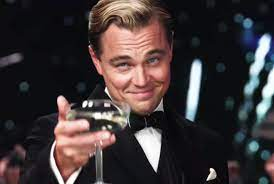